# Statistics 131 Final Project: Secondary Infertility
By: Aurora Cardenas & Danielle Doppee

## Introduction

Our data comes from a study at the University of Athens Medical School in Greece in 1976. The data was collected from women admitted to the First Department of Obstetrics and Gynaecology or the Divisons of Fertility and Sterility whom were complaining of secondary infertility. Secondary infertility is defined as, after a first pregnancy and labor, the inability to carry the pregnancy long enough to deliver a baby. The purpose of this study was to determine how induced and spontaneous abortions affect secondary infertility. Spontaneous abortions are considered miscarriages of pregnancy. Induced abortions were illegal at the time that the study was conducted and were majorly performed with the technique of dilation and curettage, which is a surgical procedure in which the cervix is opened (dilated) and a thin instrument is inserted into the uterus to remove uterine tissue. This is a very risky procedure that would not have been performed by trained medical doctors or nurses because of the legality issues surrounding abortions in Greece in the 1970's. 

Out of 110 women which matched study criteria of previous conception, married, husbands with normal semen analysis, and had been trying to become pregnant for over a year and a half, 100 were admitted into the study. For each of the 100 women in the study, researchers attempted to find two other women with similar age, level of education, and parity to be control subjects for the case subjects in the matched case-control study. Parity is defined as the number of pregnancies carried to a viable gestational term--meaning the babies had fully formed organ systems, and would be able to sustain their own life with the help of a medical team. 

The researchers were only able to find control matches for 83 of the original 100 subjects, so only these 83 women made it into the final sample of the study. The purpose of the matched case-control study design was to minimize bias within the study. To be considered in the study as a control, a woman had to have been on her next pregnancy-- meaning she had identical characteristics to the woman considered the case (age, parity, and level of education), except for the fact that she was pregnant again. For example, if the case subeject had given birth once before, and was complaining of secondary infertility, then the control subject for that subject was identical in study characteristics with the exception of being in her second pregnancy. This only served to show that the control women were still fertile, otherwise the current pregnancy was not taken into account. 

The nature of this data will heavily effect the method of analysis. The matched-case structure means that the proportions of secondary infertility in this data are known and pre-chosen which limits our ability to make conclusions. The method of analysis we have chosen to pursue is logistic regression to predict secondary infertility from the features collected from the women in the study. We will look at two logistic regression models and discuss the important features such as coefficients, p values, accuracy of prediction, and more. 


## The Data & Light Cleaning

Below, you will see the structure of the data as well as explanations of the variables found in the abortions dataset. 

In [3]:
#packages
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from scipy.stats import chisquare
from sklearn.metrics import confusion_matrix

os.chdir("/Users/Danielle/Downloads")
abortion=pd.read_csv("abortions.csv")
abortion=abortion.drop("Unnamed: 0",1) 
abortion.head()



,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,0-5yrs,26,6,1,1,2,1,3
1,0-5yrs,42,1,1,1,0,2,1
2,0-5yrs,39,6,2,1,0,3,4
3,0-5yrs,34,4,2,1,0,4,2
4,6-11yrs,35,3,1,1,1,5,32


In this section, we define the variables of interest and discuss decisions about data cleaning and viewing. 

The variable __education__ is a categorical variable used for classifying the number of years of education of a woman. A value of 0-5 years is the lowest level of education meaning a woman had either no education, or never got to middle school level; 6-11 years means a woman had gone to middle or high school but did not finish that portion of education; 12+ years means a woman graduated at the high school level and possibly went to college or other forms of higher education. The variable __age__ is a continuous variable representing the age of the mother at the time of data collection. The variable __parity__ is a continuous variable for the number of pregnancies carried to a viable gestational term. A viable gestational term is 20 or more weeks into a pregnancy. The variable __induced__ is a categorical variable indicating the number of times a patient had an induced abortion. A value of 0 or 1 represents that number of induced abortions, but a value of 2 indicates 2 or more induced abortions. The variable __spontaneous__ is a categorical variable indicating the number of times a patient had a spontaneous abortion. A value of 0 or 1 represents that number of spontaneous  abortions, but a value of 2 indicates 2 or more spontaneous abortions. __Case__ is a binary variable representing if a woman did or did not experience infertility with values of 1 or 0.  The other variables included in the analysis are for pairing up a case and controls for the matched case structure of the data, but were not used in analysis so we will not mention them in detail. 

There was not much to be done in terms of data cleaning. The dataset we decided to explore was very clean already. Most decisions made to alter variables were for aesthetic purposes.  In order to produce graphics which fully represent the data and variables, we decided to revalue a few of the categorical variables. We changed values of (2) to (2+) for spontaneous and induced as well as took away bulky units on the variable education. 


In [4]:
#revalued for ease in plotting
abortion.induced=abortion.induced.replace([0,1,2],['0','1','2+'])
correct = ['0','1','2+']
abortion.induced = pd.Categorical(abortion.induced, correct)
abortion.spontaneous=abortion.spontaneous.replace([0,1,2],['0','1','2+'])
abortion.spontaneous = pd.Categorical(abortion.spontaneous, correct)

abortion.education=abortion.education.replace(["0-5yrs","6-11yrs","12+ yrs"],["0-5","6-11","12+"])
correct2 = ["0-5","6-11","12+"]
abortion.education = pd.Categorical(abortion.education, correct2)


## Exploratory Analysis
Now, we will look into the variable distributions and trends within our dataset.  Based on the way this data was collected and study subjects were chosen, we expect 166 control and 83 cases of secondary infertility; a perfect 2:1 ratio. However, only 82 of our case subjects had 2 control matches; 1 subject, stratum 74, has only 1 control match, which accounts for these frequencies below. We do not expect this discrepancy to have an effect on analysis. 

In [5]:
print(pd.DataFrame(abortion.case.value_counts()))


   case
0   165
1    83


We begin our exploration into predictors with our first variable in the data, education. 

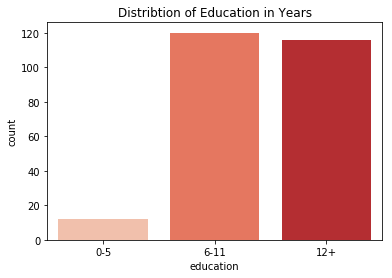

6-11    120
12+     116
0-5      12
Name: education, dtype: int64


In [6]:
seq_col_brew = sns.color_palette("Reds", 3)
sns.set_palette(seq_col_brew)
sns.countplot(x='education', data=abortion)
plt.title("Distribtion of Education in Years")
plt.show()
print(abortion.education.value_counts()) 

In the above plot, we see the distribution of the education variable. There are similar frequencies of education for women having 6-11 years and 12+ years of education. Very few women which participated in the study have low levels of education. 



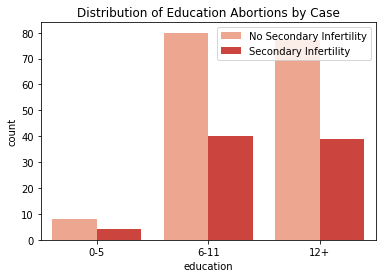

In [7]:
seq_col_brew = sns.color_palette("Reds", 2)
sns.set_palette(seq_col_brew)
plot1=sns.countplot(x = 'education',hue = "case",data = abortion)
plt.title("Distribution of Education Abortions by Case")
new_labels = ['No Secondary Infertility', 'Secondary Infertility']
plot1.legend(labels=new_labels)
plt.show()


Here we see another similar trend among groups of education--indicating independence. 


Next, we moved on to the variable induced.

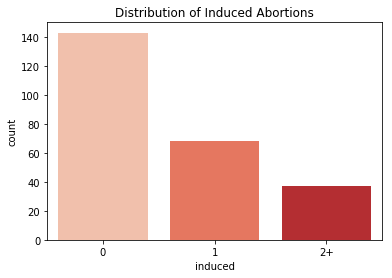

In [8]:
seq_col_brew = sns.color_palette("Reds", 3)
sns.set_palette(seq_col_brew)
sns.countplot(x = 'induced',data = abortion)
plt.title("Distribution of Induced Abortions")
plt.show()

We see the barplot above which shows the overall distribution of induced abortions. There are many women who have never had an induced abortion. As the number of induced abortions increases, the frequency of women decreases. 

Based on the study paper's background information of dangerous induced abortion methods used in Greece in the 70's, we expected to see a high proportion of women with 2+ induced abortions having secondary infertility. However, we do not see this relationship. 

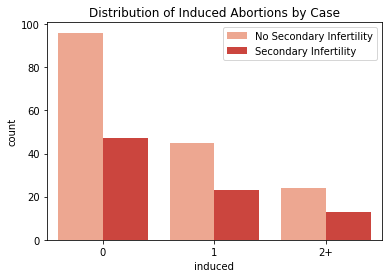

In [9]:
seq_col_brew = sns.color_palette("Reds", 2)
sns.set_palette(seq_col_brew)
plot1=sns.countplot(x = 'induced',hue = "case",data = abortion)
plt.title("Distribution of Induced Abortions by Case")
new_labels = ['No Secondary Infertility', 'Secondary Infertility']
plot1.legend(labels=new_labels)
plt.show()



In fact, we see similar rates of having secondary infertility and not having secondary infertility among groups of women with similar histories of induced abortions. This indicates that induced abortions may be, at least in the case of this data, independent of secondary infertility. It most likely will not be able to predict secondary infertility alone.

Next, we explored the variable spontaneous. 

Below, we see the barplot of the distribution of spontaneous abortions. It has a very similar distribution to induced abortions.  Most of the study women have never had a miscarriage. 

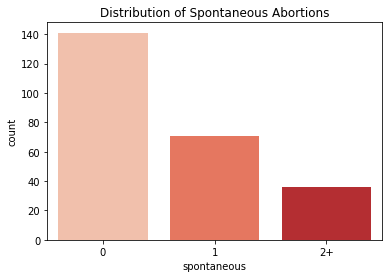

In [10]:
seq_col_brew = sns.color_palette("Reds", 3)
sns.set_palette(seq_col_brew)
sns.countplot(x = 'spontaneous',data = abortion)
plt.title("Distribution of Spontaneous Abortions")
plt.show()

We were interested to see how spontaneous abortions were related to secondary infertility.

In the plot below, we see the distribution of spontaneous abortions (miscarriages) by case. As the number of spontaneous abortions increase, we see an increase in case of secondary infertility. This makes intuitive sense because miscarriages may indicate biologicical complications for child-bearing. We believe this will be an important predictor of secondary infertility.  

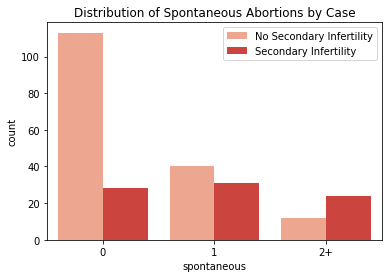

In [11]:
seq_col_brew = sns.color_palette("Reds", 2)
sns.set_palette(seq_col_brew)
plot2 = sns.countplot(x = 'spontaneous',hue = "case",data = abortion)
plt.title("Distribution of Spontaneous Abortions by Case")
new_labels = ['No Secondary Infertility', 'Secondary Infertility']
plot2.legend(labels=new_labels)
plt.show()

Next up is the variable Age. 

The histogram below shows the distribution of the continuous variable age. We see a bimodal distribtion. Also included below is the summary for this variable. We see that the mean and the median are close in value which indicates that the data is not skewed. The youngest subject in the study was 21 and the oldest was 44. 

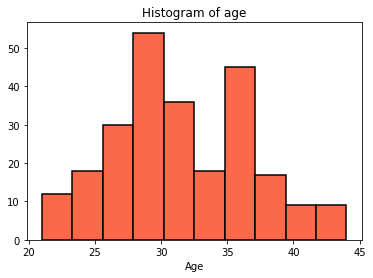

              age
count  248.000000
mean    31.504032
std      5.251565
min     21.000000
25%     28.000000
50%     31.000000
75%     35.250000
max     44.000000


In [12]:
seq_col_brew = sns.color_palette("Reds", 1)
sns.set_palette(seq_col_brew)


plt.hist(x = "age",data = abortion,edgecolor = "black",linewidth = 1.5)
plt.title("Histogram of age")
plt.xlabel("Age")
plt.show()
print(pd.DataFrame(abortion.age.describe()))

Below, we looked into the distribution of age by case. Overall the age variable looks independent of secondary infertility because we see the same trend in both groups.  This is due to the matched case nature of the study. 

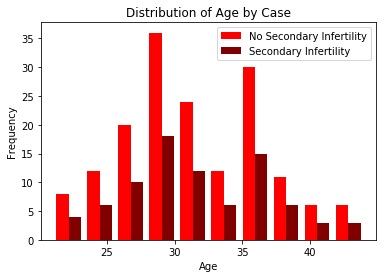

In [13]:
import warnings; warnings.simplefilter('ignore')

plt.hist([abortion.loc[abortion.case ==0].age,abortion.loc[abortion.case ==1].age],color = ["r","maroon"])
plt.title("Distribution of Age by Case")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["No Secondary Infertility","Secondary Infertility"])
plt.show()

On to parity!

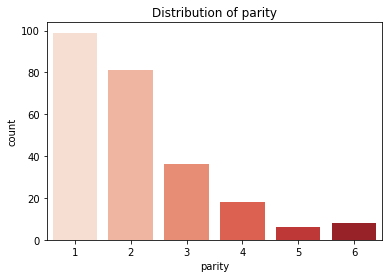

           parity
count  248.000000
mean     2.092742
std      1.251504
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      6.000000


In [14]:
seq_col_brew = sns.color_palette("Reds", 6)
sns.set_palette(seq_col_brew)
sns.countplot(x = "parity",data = abortion)
plt.title("Distribution of parity")
plt.show()
print(pd.DataFrame(abortion.parity.describe()))


Above, we have included the barplot for the distribution of parity. We see a negative trend in this variable. This is telling of the distribution of the number of pregnancies the subjects have had. Fifty percent of the women in the study have had 2 or less pregnancies that have been carried to a viable gestational term. There are few which have had 3 or more pregnancies. This corresponds to what we know about how the data was collected. Women have to have had at least 1 previous pregnancy carried to a viable gestational term.  


Below, we have included a plot of parity by secondary infertility. There are similar trends for each group of women with similar histories of parity which leads us to believe that it may be indepedent. 

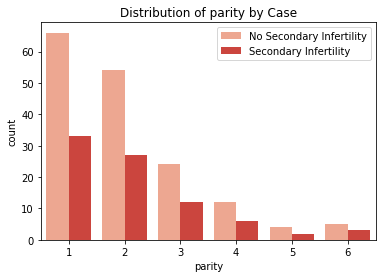

In [15]:
seq_col_brew = sns.color_palette("Reds", 2)
sns.set_palette(seq_col_brew)
plt.title("Distribution of parity by Case")
plot3=sns.countplot(x = "parity",hue = "case",data = abortion)
new_labels = ['No Secondary Infertility', 'Secondary Infertility']
plot3.legend(labels=new_labels)
plt.show()


After this basic exploratory analysis of variables and their relationship to having the condition of secondary infertility, we wanted to see if any of these variables were related to each other. 


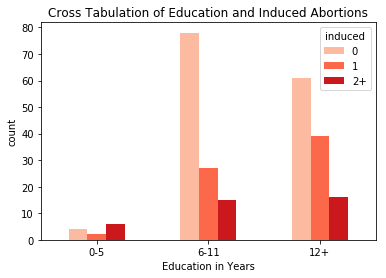

induced     0   1  2+
education            
0-5         4   2   6
6-11       78  27  15
12+        61  39  16


In [16]:
seq_col_brew = sns.color_palette("Reds",3)
sns.set_palette(seq_col_brew)
pd.crosstab(abortion.education,abortion.induced).plot(kind='bar')
plt.xticks(rotation=360)
plt.title("Cross Tabulation of Education and Induced Abortions")
plt.xlabel("Education in Years")
plt.ylabel("count")
plt.show()
print(pd.crosstab(abortion.education,abortion.induced))


In the above plot, we see the distribution of education grouped by number of induced abortions. The majority of women who had no induced abortions come from the education group of 6-11 years. One thing we find interesting is that of the women who have 0-5 years of education, they have the highest relative number of induced abortions. This may indicate that these women are making decisions to have illegal induced abortions more often than women with higher levels of education. However the count of women in this education level is quite low, which may be because of the convinience sample taken from the Department of Obstetrics and Gynaecology.


In the plot below is the relationship of the education and spontaneous abortion variables. We see that the trend of number of spontaneous abortions in each level of education is similar. This is expected because levels of education do not cause physical alterations of physiology in women. Spontaneous abortions (miscarriages) are independent of level of education. 

spontaneous   0   1  2+
education              
0-5           9   1   2
6-11         71  33  16
12+          61  37  18


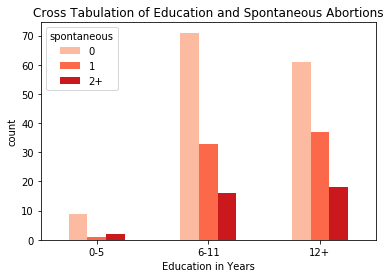

In [17]:
import seaborn as sns 
seq_col_brew = sns.color_palette("Reds", 3)
sns.set_palette(seq_col_brew)
print(pd.crosstab(abortion.education,abortion.spontaneous))
pd.crosstab(abortion.education,abortion.spontaneous).plot(kind='bar')
plt.title("Cross Tabulation of Education and Spontaneous Abortions")
plt.xlabel("Education in Years")
plt.ylabel("count")
plt.xticks(rotation=360)
plt.show()


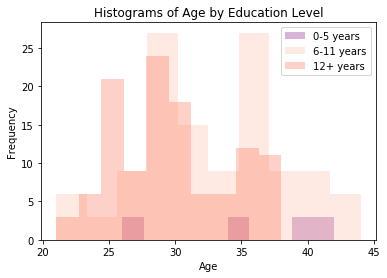

             age
education       
0-5        35.25
6-11       32.85
12+        29.72


In [18]:
abortion.age[abortion.education == "0-5"].plot(kind = "hist",alpha = 0.3,label = "0-5 years",color = "purple")
abortion.age[abortion.education == "6-11"].plot(kind = "hist",alpha = 0.3,label = "6-11 years")
abortion.age[abortion.education == "12+"].plot(kind = "hist",alpha = 0.3,label = "12+ years")
seq_col_brew = sns.color_palette("Reds", 3)
sns.set_palette(seq_col_brew)
plt.xlabel("Age")
plt.title("Histograms of Age by Education Level")
plt.legend()
plt.show()
print(pd.DataFrame(round(abortion.groupby('education').mean().age, 2)))


Above, in the plot of layered histograms, we see that the women with the highest levels of education are actually younger on average than the women in the other age groups. 
In fact, we see that the more education achieved, the younger on average the women are for this particular sample. We do not believe this association to matter to our analysis. 

## Data Modeling

Due to the structure of our data, we wanted to get rid of as much collinearity as possible. So we decided to remove two of the three variables which the subjects were matched on, education and parity. We think that age is a good predictor of secondary infertility because of our knowledge on female reproductive systems. We have decided to use induced abortion in this model despite it's independence for lack of other important factors. Spontaneous is another variable added to the model because of its association with the outcome explored above. 

We chose to run a logistic model. We used a logistic regression because we were interested in how secondary infertility may be affected by the important predictors. We hypothesize that there is a relationship with age, number of induced abortions, and number of spontaneous abortions--we believe that as all of the predictors rise in value, meaning as you age and have higher frequencies of induced and spontaneous abortions, you have a higher odds of experiencing secondary infertility. We want to see if a model can classify subjects as either having or not having secondary infertility.



### Predicting Secondary Infertility with Age, Induced & Spontaneous

This section begins discussing a model predicting secondary infertility with predictors of age, induced, and spontaneous. 

In [2]:
#reset the data for modeling (we only cleaned to be able to make pretty graphics)
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

os.chdir("/Users/Danielle/Downloads")
abortion=pd.read_csv("abortions.csv")
abortion=abortion.drop("Unnamed: 0",1)


X=abortion[["age","induced","spontaneous"]]
y=abortion.case
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34) 
#chose a test size of 30% 

#Single instance of logistic 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = pd.Series(logreg.predict(X_test))
print(y_pred.head()) #1 indicates secondary infertility, 0 indicates no secondary infertility


0    0
1    1
2    0
3    1
4    1
dtype: int64


Below, we have printed the exponentiated coefficients from the model, the odds. From the odds we see that age is right around 1, meaning it really plays no role in predicting secondary infertility. An induced abortion means you are 40% as likely to have secondary infertility as someone with no induced abortion. And if a subject has a miscarriage, they are 3 times as likely to have seconday infertility. 



In [3]:
coeff = logreg.coef_.T
names = ["age","induced","spontaneous"]
#from sklearn.feature_selection import chi2
#scores, pvalues = chi2(X_test, y_test)

df = pd.DataFrame(np.exp(coeff),dtype='str', index=names)
#df["pvals"] = pvalues

print(df)  





                              0
age          0.9898815166952069
induced      1.3961770305683052
spontaneous   3.164680004829936


Next, we analyzed the confusion matrix for this model. 

In [63]:
#confusion matrix for model
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41  8]
 [18  8]]


This model has an accuracy of around 65%.  There is a high rate of predictions which are false negatives, meaning that the model predicts no secondary infertility when in reality they do have it. Conversely, there are eight false positive predictions, meaning that these actually did not have secondary infertility but the model predicted they did. We think, in this context, that having a higher false negative rate is less favorable because these women would actually have secondary infertility but the model predicts that they don't have the condition--this could lead to false hope. 

In [48]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.84      0.76        49
          1       0.50      0.31      0.38        26

avg / total       0.63      0.65      0.63        75



The precision is the ratio true pos / (true pos + false pos) The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 

Of 75 women in the testing data:
When a woman doesnt actually have secondary infertility, the test is correctly predicting this 69% of the time. 
When a woman does have secondary interfility, the test is correctly predicting this 50% of the time. This is unfavorable as only about 50% of the women that do have it would be predicted to have secondary infertility. This model becomes basically useless because it is no better at predicting than a coin flip. We will perform cross validation to validate these findings. 

In [49]:
#K-fold CV logistic for model1
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.734


After performing 10-fold cross validation. we see our accuracy increase to 73%. 
This accuracy is still not great. 
Let's take a look at an ROC curve to see a visual representation of how well the model is predicting. 

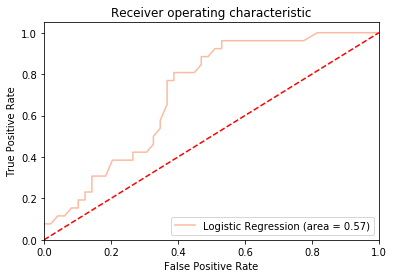

In [50]:
#roc curve model1


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The area under the curve depends on how well the test separates those with or without secondary infertility. Because an accuracy of 0.50 is deemed worthless, we see that our three predictors are not doing a good job, as the area is only 0.57.

Because our first model does not perform well. We have decided to explore a second model using an additional predictor, parity. 

### Predicting Secondary Infertility with Age, Parity, Induced & Spontaneous

In [4]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

os.chdir("/Users/Danielle/Downloads")
abortion=pd.read_csv("abortions.csv")
abortion=abortion.drop("Unnamed: 0",1)

X=abortion[["age","parity","induced","spontaneous"]]
y=abortion.case
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)


In [5]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = pd.Series(logreg.predict(X_test))
print(y_pred.head())


0    0
1    1
2    0
3    1
4    1
dtype: int64


Here, we have again printed the exponentiated coefficients for interpretation. We see that for each extra child carried to a gestational term of 20 weeks a woman is 46% less likely to have secondary infertility. The odds for induced and spontaneous are much higher. A woman who has had an induced abortion is 2.44 times as likely to have secondary infertility. A woman who has had a miscarriage is 5.6 times as likely to have secondary infertility. 

In [67]:
coeff = logreg.coef_.T
names = ["age","parity","induced","spontaneous"]
#from sklearn.feature_selection import chi2
#scores, pvalues = chi2(X_test, y_test)

df = pd.DataFrame(np.exp(coeff),dtype='str', index=names)
#df["pvals"] = pvalues

print(df)  



                              0
age          1.0090438960148067
parity       0.5411986838483909
induced       2.437431030123143
spontaneous   5.642926084923594


Next, we will look at the confusion matrix. 

In [60]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[36 13]
 [ 8 18]]


This model has an accuracy of around 72%.  

This model has a higher rate of false positives than false negatives, meaning the model more often predicts secondary infertility when in reality the subject does not have the condition.  As mentioned previously, this is arguably more favorable because it would be better to be told you have secondary infertility and find out that is not true than to be told you don't have the condition and not be able to become pregnant.  


In [55]:
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.82      0.73      0.77        49
          1       0.58      0.69      0.63        26

avg / total       0.74      0.72      0.72        75



Of 75 women in the testing data:
When a woman doesnt actually have secondary infertility, the test is correctly predicting this 82% of the time. 
When a woman does have secondary interfility, the test is correctly predicting this 58% of the time. This is unfavorable as only about 60% of the women that do have it would be predicted to have secondary infertility. This is quite low in terms of accuracy of prediction. 

In [39]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.728


After performing 10-fold cross validation with this model. we see the accuracy increase only slightly up to just under 73%

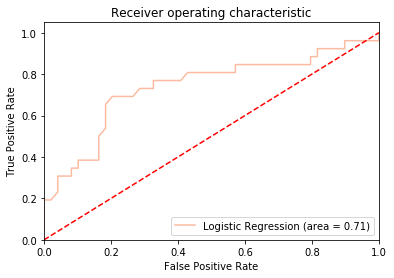

In [40]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The area under this second ROC curve is 0.71. This is an improvement from the previous model, which indicates that parity is a good additional predictor of a subject experiencing secondary infertility.


## Conclusions

Overall, we have found that more information is needed to increase the accuracy of prediction of secondary infertility. Neither of the models we explored had outstanding accuracy, although 73% isn't too bad. Of the predictors we had considered, the strongest predictor of this condition is the count of spontaneous abortions. There is a strong association between the number of miscarriages and having secondary infertility. Occasionally, we were surprised at the conclusions that we had discovered; This includes the finding that the number of induced abortions is not associated with secondary infertility. We also believe that, had this not been a convinience sample and data from a matched-case study, we would have more significance in some of these predictors because they would not have been used as blocks in the study design. 




